<a href="https://colab.research.google.com/github/sipocz/NRG_estimator/blob/main/NRG_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Energy estimator
# S.L. 2023.10.


In [ ]:
!pip install -U kaleido

In [ ]:
import pandas as pd
import plotly.graph_objects as go

In [ ]:
def grafikon(fx,desc1,txt1,desc2="",txt2="",ngraf=2,c1='rgba(0,200,0,0.8)', c2='rgba(200,0,0,0.3)',x=None,title=None):
    '''
    grafikon(fx,desc1,txt1,desc2="",txt2="",ngraf=2,c1='rgba(0,200,0,0.8)', c2='rgba(200,0,0,0.3)')

    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c2: color1
    c2: color2

    '''
    #x_=[i for i in range(len(y_pred))]

    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(rows=1, cols=1,)

    if x==None:
        x_coordinates=fx.index
    else:
        x_coordinates=fx[x]

    if title==None:
        if txt2=="":
            title=txt1
        else:
            title = txt1+" & "+txt2


    fig0.add_trace(
            go.Scatter(x=x_coordinates, y=fx[desc1], name=txt1,line=dict(color=c1) ,showlegend=True  ),
        row=1, col=1 )

    if ngraf==2:
        fig0.add_trace(
            go.Scatter(x=x_coordinates, y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),
            row=1, col=1
        )

    fig0.update_layout(
        title=title,
        autosize=False,
        width=1024,
        height=768,
        )

    fig0.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
goo_drive="/content/gdrive/MyDrive/NRG_estimator"

In [ ]:
fit_data=("FIT2631_220101_220801.csv","FIT2631_220801_221231.csv")

In [ ]:
rekt_data=("U03_reflux_220101_220701.csv","U03_reflux_220701_230101.csv")

In [ ]:
fname_steam=goo_drive+"/"+fit_data[0]
fname_rect=goo_drive+"/"+rekt_data[0]

fname_steam2=goo_drive+"/"+fit_data[1]
fname_rect2=goo_drive+"/"+rekt_data[1]




In [ ]:
print("0")

steam_df=pd.read_csv(fname_steam, sep=";",decimal=",",header=None)
steam_df.columns=["Date","Steam","state"]
print("1")
steam_df2=pd.read_csv(fname_steam2, delimiter=";",decimal=",",header=None, low_memory=False,)
steam_df2.columns=["Date","Steam","state"]


print("2")


rekt_df=pd.read_csv(fname_rect,sep=";",decimal=",",header=None)
rekt_df.columns=["Date","Rekt","state"]
print("3")

rekt_df2=pd.read_csv(fname_rect2,delimiter=";",decimal=",",header=None, low_memory=False)
rekt_df2.columns=["Date","Rekt","state"]


0
1
2
3


In [ ]:
steam_df2.describe()

Date        Steam   state
count    618905       618905  618905
unique   599182         1350       3
top     No Data  0,251773864      OK
freq      12800        77042  606045

In [ ]:
steam_df.tail()

Date     Steam state
842483  2022.07.31 23:58:53  0.289921    OK
842484  2022.07.31 23:59:13  0.933852    OK
842485  2022.07.31 23:59:33  0.405890    OK
842486  2022.07.31 23:59:53  0.251774    OK
842487   2022.08.01 0:00:33  0.553903    OK

In [ ]:
steam_df_big=pd.concat([steam_df,steam_df2], axis=0)
rekt_df_big=pd.concat([rekt_df,rekt_df2],axis=0)


In [ ]:
steam_df2.describe()

Date        Steam   state
count    618905       618905  618905
unique   599182         1350       3
top     No Data  0,251773864      OK
freq      12800        77042  606045

In [ ]:
steam_df_big.tail()

Date        Steam state
635236  2022.12.31 23:58:45  0,518806756    OK
635237  2022.12.31 23:59:06  0,596627772    OK
635238  2022.12.31 23:59:18  0,332646668    OK
635239  2022.12.31 23:59:39  0,289921403    OK
635240  2022.12.31 23:59:58  0,405889988    OK

In [ ]:
print(f"{steam_df_big.isnull().sum()} \ndarab  NAN van a DF-ben" )

Date     16336
Steam    16336
state    16336
dtype: int64 
darab  NAN van a DF-ben


In [ ]:
steam_df_big.dropna(inplace=True)
rekt_df_big.dropna(inplace=True)

In [ ]:
steam_df_big[steam_df_big["Date"]=="No Data"]

Date    Steam    state
20464  No Data  No Data  No Data
20465  No Data  No Data  No Data
20466  No Data  No Data  No Data
20467  No Data  No Data  No Data
20468  No Data  No Data  No Data
...        ...      ...      ...
49595  No Data  No Data  No Data
49596  No Data  No Data  No Data
49597  No Data  No Data  No Data
49598  No Data  No Data  No Data
49599  No Data  No Data  No Data

[12800 rows x 3 columns]

In [ ]:
steam_df_big.drop(steam_df_big[steam_df_big["Date"]=="No Data"].index,inplace=True)
rekt_df_big.drop(rekt_df_big[rekt_df_big["Date"]=="No Data"].index,inplace=True)

In [ ]:
steam_df_big["Date"]=pd.to_datetime(steam_df_big["Date"])

rekt_df_big["Date"]=pd.to_datetime(rekt_df_big["Date"])


In [ ]:
steam_df_big.Steam=steam_df_big.Steam.astype(str)
steam_df_big.Steam=steam_df_big.Steam.apply(lambda x: x.replace(',','.'))
steam_df_big.Steam=steam_df_big.Steam.astype(float)
rekt_df_big.Rekt=rekt_df_big.Rekt.astype(str)
rekt_df_big.Rekt=rekt_df_big.Rekt.apply(lambda x: x.replace(',','.'))
rekt_df_big.Rekt=rekt_df_big.Rekt.astype(float)




In [ ]:
steam_df_big.head()

Date     Steam state
0 2022-01-01 00:00:09  0.367742    OK
1 2022-01-01 00:00:29  0.332647    OK
2 2022-01-01 00:00:50  0.440986    OK
3 2022-01-01 00:01:09  0.553903    OK
4 2022-01-01 00:01:29  0.289921    OK

In [ ]:
day_sample=3*60*24

In [ ]:
print(f"{day_sample=}")

day_sample=4320


In [ ]:
steam_df_big.set_index("Date",inplace=True)




In [ ]:
rekt_df_big.set_index("Date",inplace=True)

In [ ]:
steam_df_big.reindex()

Steam state
Date                               
2022-01-01 00:00:09  0.367742    OK
2022-01-01 00:00:29  0.332647    OK
2022-01-01 00:00:50  0.440986    OK
2022-01-01 00:01:09  0.553903    OK
2022-01-01 00:01:29  0.289921    OK
...                       ...   ...
2022-12-31 23:58:45  0.518807    OK
2022-12-31 23:59:06  0.596628    OK
2022-12-31 23:59:18  0.332647    OK
2022-12-31 23:59:39  0.289921    OK
2022-12-31 23:59:58  0.405890    OK

[1435793 rows x 2 columns]

In [ ]:

steam_mean_10m_df =  steam_df_big.resample("10min").agg({'Steam': 'mean'})
rekt_mean_10m_df =  rekt_df_big.resample("10min").agg({'Rekt': 'mean'})

steam_mean_1h_df =  steam_df_big.resample("60min").agg({'Steam': 'mean'})
rekt_mean_1h_df =  rekt_df_big.resample("60min").agg({'Rekt': 'mean'})



In [ ]:
steam_mean_1h_df.tail()

Steam
Date                         
2022-12-31 19:00:00  0.579926
2022-12-31 20:00:00  0.523576
2022-12-31 21:00:00  0.593297
2022-12-31 22:00:00  0.575216
2022-12-31 23:00:00  0.571313

In [273]:
# Create the figure and axes objects, specify the size and the dots per inches
def grafikon2(fx,desc1,txt1,desc2="",txt2="",ngraf=1,c1='rgba(0,200,0,0.8)', c2='rgba(200,0,0,0.3)',x=None,xlabel="",title=None, title2=None):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

    # Plot lines

    y_data = fx[desc1]
    x_data = fx.index

    if ngraf==1:
        line = ax.plot(x_data, y_data, label=txt1)
    if ngraf==2:

        y2_data=fx[desc2]
        line1 = ax.plot(x_data, y_data, label=txt1)
        line2 = ax.plot(x_data, y2_data, label=txt2)

    ax.set_xlabel(xlabel, fontsize=12, labelpad=10) # No need for an axis label
    ax.xaxis.set_label_position("bottom")

    ax.legend(loc="best", fontsize=8)
    if ngraf==1:
        y_label=txt1
    if ngraf==2 and len(txt2)>0:
        y_label=txt1+" & "+txt2
    ax.set_ylabel(y_label, fontsize=12, labelpad=10)

    ax.spines[['top','right']].set_visible(False)
    ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
    ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))
    ax.text(x=0.05, y=.93, s=title, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
    ax.text(x=0.05, y=.90, s=title2, transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)



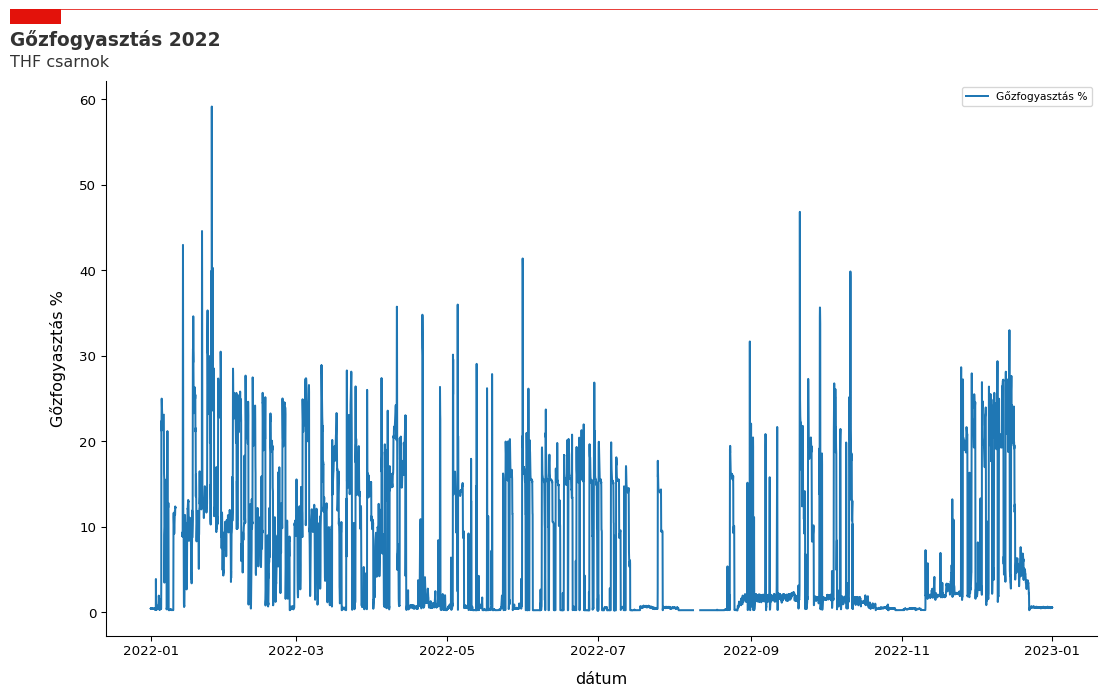

In [235]:
grafikon2(steam_mean_1h_df,"Steam","Gőzfogyasztás %",xlabel="dátum", title="Gőzfogyasztás 2022", title2="THF csarnok")

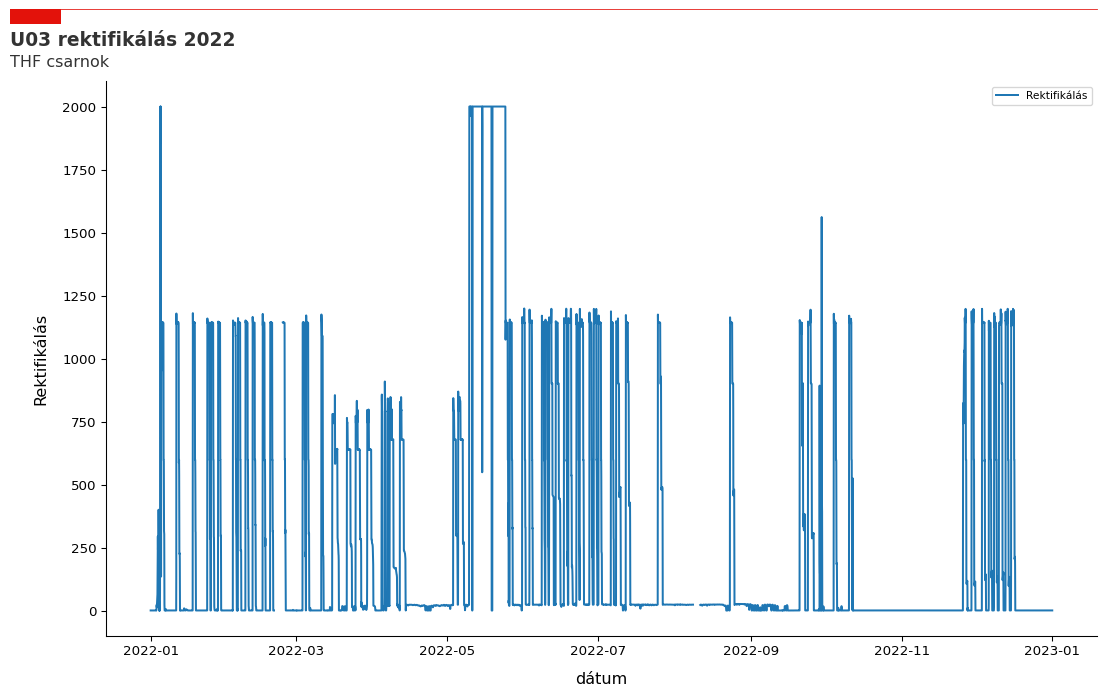

In [225]:
grafikon2(rekt_mean_1h_df,"Rekt","Rektifikálás",ngraf=1,c1="rgba(20,20,20,0.8)",xlabel="dátum", title="U03 rektifikálás 2022", title2="THF csarnok")

In [ ]:
len(rekt_mean_1h_df)

8760

In [ ]:
len(steam_mean_10m_df)

52560

In [ ]:
rekt_mean_10m_df.head()

Rekt
Date                         
2022-01-01 00:00:00  2.929732
2022-01-01 00:10:00  2.892580
2022-01-01 00:20:00  2.887476
2022-01-01 00:30:00  2.887476
2022-01-01 00:40:00  2.933123

In [ ]:
steam_mean_10m_df.head()

Steam
Date                         
2022-01-01 00:00:00  0.426235
2022-01-01 00:10:00  0.469929
2022-01-01 00:20:00  0.381803
2022-01-01 00:30:00  0.403928
2022-01-01 00:40:00  0.532750

In [ ]:
# összerakjuk a két dataframe adatait


In [ ]:
all_df=pd.concat([rekt_mean_10m_df,steam_mean_10m_df],axis=1)
all_df_1h=pd.concat([rekt_mean_1h_df,steam_mean_1h_df],axis=1)


In [ ]:
all_df_1h.head()

Rekt     Steam
Date                                   
2022-01-01 00:00:00  2.909059  0.442994
2022-01-01 01:00:00  2.895062  0.452046
2022-01-01 02:00:00  2.930335  0.398425
2022-01-01 03:00:00  2.921711  0.477364
2022-01-01 04:00:00  2.925967  0.450622

In [ ]:
all_df_1h.corr()

Rekt     Steam
Rekt   1.000000  0.470801
Steam  0.470801  1.000000

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from statsmodels.tsa.seasonal import  seasonal_decompose

import matplotlib as mpl

In [ ]:
print(f"{all_df.isnull().sum()} \ndarab  NAN van a DF-ben" )

Rekt     991
Steam    876
dtype: int64 
darab  NAN van a DF-ben


In [ ]:
all_df.dropna(inplace=True)

In [ ]:
all_df_1h.dropna(inplace=True)

In [ ]:
all_df_1h.head()

Rekt     Steam
Date                                   
2022-01-01 00:00:00  2.909059  0.442994
2022-01-01 01:00:00  2.895062  0.452046
2022-01-01 02:00:00  2.930335  0.398425
2022-01-01 03:00:00  2.921711  0.477364
2022-01-01 04:00:00  2.925967  0.450622

In [ ]:
def df_seasonal_decompose(df,tag,title):

    import plotly.express as px
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    data1 = seasonal_decompose(df[tag][0:-1].values,model="additive", period=24*7) # 60 percenként vannak a minták

    fig2 = make_subplots(rows=4, cols=1,shared_xaxes=True)
    fig2.add_trace(
        go.Scatter(x=df.index[0:-1], y=data1.resid,name="Residual" ),

        row=1, col=1
    )
    fig2.add_trace(
        go.Scatter( x=df.index[0:-1], y=data1.trend,name="Trend"),

        row=2, col=1
    )
    fig2.add_trace(
        go.Scatter( x=df.index[0:-1], y=data1.seasonal,name="Seasonal"),

        row=3, col=1
    )

    fig2.add_trace(
        go.Scatter( x=df.index[0:-1], y=data1.observed,name="Observed"),

        row=4, col=1
    )

    fig2.update_layout(
        title=title,
        font_family="Courier New",
        font_color="blue",
        title_font_family="Times New Roman",
        title_font_color="red",
    )

    fig2.show()
    return(data1)


In [ ]:
df_seasonal_decompose(all_df_1h,"Steam","Steam seasonal")

In [ ]:
df_seasonal_decompose(all_df_1h,"Rekt","Rectification seasonal")

In [ ]:
# METEOSTAT data access

In [ ]:
!pip install meteostat

In [229]:
'''
Dorog Historical meteo Data
"""
'''
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Daily, Point, Hourly


dorog = Point(47.724289, 18.723552, 110)

# Time period
start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)

# Get monthly data
# Then, aggregate annually
weather_data = Hourly(dorog, start, end)
weather_data = weather_data.normalize().aggregate(freq="1h").fetch()




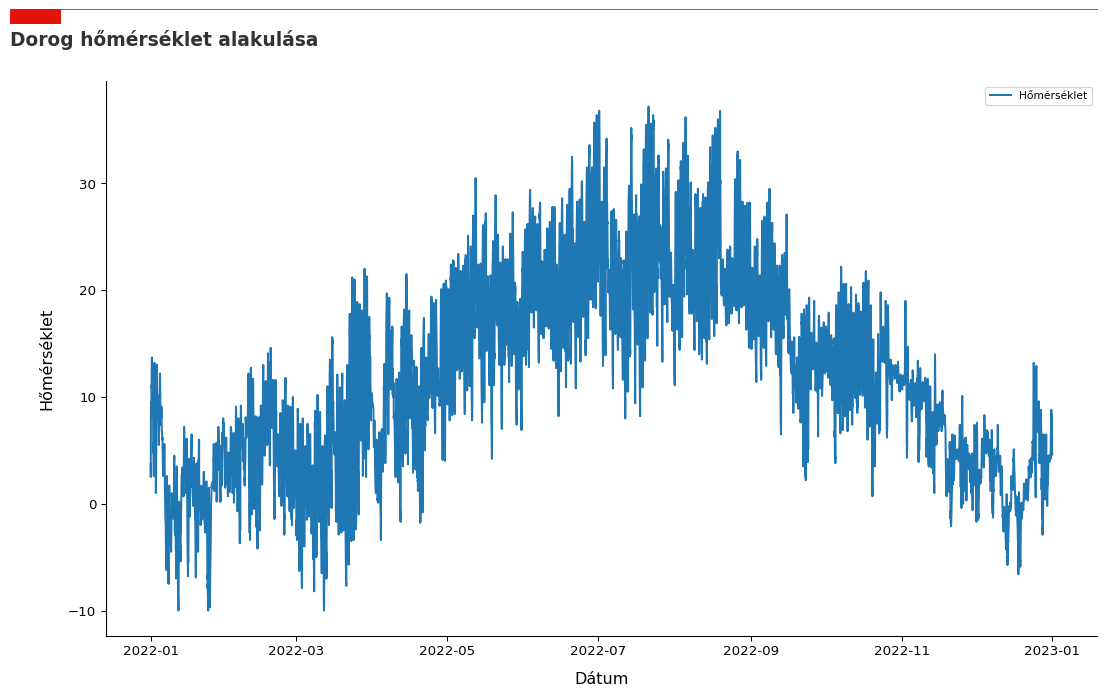

In [231]:
grafikon2(weather_data,"temp","Hőmérséklet",title="Dorog hőmérséklet alakulása",xlabel="Dátum")

In [ ]:
weather_data

temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2022-01-01 00:00:00   3.7   3.1  96.0   0.0   NaN  300.0   7.2  16.7  1020.2   
2022-01-01 01:00:00   2.5   1.8  95.0   0.0   NaN  287.0   4.0  18.5  1019.9   
2022-01-01 02:00:00   7.2   6.8  97.0   0.0   NaN  295.0  10.8  25.9  1019.8   
2022-01-01 03:00:00   9.5   6.4  81.0   0.0   NaN  290.0  10.8  27.8  1020.1   
2022-01-01 04:00:00   8.6   5.2  79.0   0.0   NaN  300.0  10.8  33.3  1020.7   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2022-12-31 20:00:00   7.9   6.2  89.0   0.0   NaN  150.0   7.2  14.8  1026.0   
2022-12-31 21:00:00   7.4   5.9  90.0   0.0   NaN  110.0   7.2  14.8  1026.0   
2022-12-31 22:00:00   5.7   4.5  92.0   0.0   NaN   71.0   7.6  11.1  1026.7   
2022-12-31 23:00:00   5.3   4.3  93.0   0.0   NaN   60.0   7.2  13.0  1026.7   
2023-01-01 00:00:00   4.6   3.7  94.0   0.0   NaN   50.0   3.6  14.8  1026.5   

                     tsun  coco  
time                             
2022-01-01 00:00:00   0.0   3.0  
2022-01-01 01:00:00   0.0   3.0  
2022-01-01 02:00:00   0.0   3.0  
2022-01-01 03:00:00   0.0   3.0  
2022-01-01 04:00:00   0.0   3.0  
...                   ...   ...  
2022-12-31 20:00:00   0.0   3.0  
2022-12-31 21:00:00   0.0   3.0  
2022-12-31 22:00:00   0.0   3.0  
2022-12-31 23:00:00   0.0   3.0  
2023-01-01 00:00:00   0.0   3.0  

[8761 rows x 11 columns]

In [ ]:
all_data=pd.concat([all_df_1h,weather_data],axis=1)

In [ ]:
all_data

Rekt     Steam  temp  dwpt  rhum  prcp  snow   wdir  \
2022-01-01 00:00:00  2.909059  0.442994   3.7   3.1  96.0   0.0   NaN  300.0   
2022-01-01 01:00:00  2.895062  0.452046   2.5   1.8  95.0   0.0   NaN  287.0   
2022-01-01 02:00:00  2.930335  0.398425   7.2   6.8  97.0   0.0   NaN  295.0   
2022-01-01 03:00:00  2.921711  0.477364   9.5   6.4  81.0   0.0   NaN  290.0   
2022-01-01 04:00:00  2.925967  0.450622   8.6   5.2  79.0   0.0   NaN  300.0   
...                       ...       ...   ...   ...   ...   ...   ...    ...   
2022-12-31 20:00:00  3.022882  0.523576   7.9   6.2  89.0   0.0   NaN  150.0   
2022-12-31 21:00:00  2.992518  0.593297   7.4   5.9  90.0   0.0   NaN  110.0   
2022-12-31 22:00:00  3.018969  0.575216   5.7   4.5  92.0   0.0   NaN   71.0   
2022-12-31 23:00:00  3.014635  0.571313   5.3   4.3  93.0   0.0   NaN   60.0   
2023-01-01 00:00:00       NaN       NaN   4.6   3.7  94.0   0.0   NaN   50.0   

                     wspd  wpgt    pres  tsun  coco  
2022-01-01 00:00:00   7.2  16.7  1020.2   0.0   3.0  
2022-01-01 01:00:00   4.0  18.5  1019.9   0.0   3.0  
2022-01-01 02:00:00  10.8  25.9  1019.8   0.0   3.0  
2022-01-01 03:00:00  10.8  27.8  1020.1   0.0   3.0  
2022-01-01 04:00:00  10.8  33.3  1020.7   0.0   3.0  
...                   ...   ...     ...   ...   ...  
2022-12-31 20:00:00   7.2  14.8  1026.0   0.0   3.0  
2022-12-31 21:00:00   7.2  14.8  1026.0   0.0   3.0  
2022-12-31 22:00:00   7.6  11.1  1026.7   0.0   3.0  
2022-12-31 23:00:00   7.2  13.0  1026.7   0.0   3.0  
2023-01-01 00:00:00   3.6  14.8  1026.5   0.0   3.0  

[8761 rows x 13 columns]

In [ ]:
del all_data["snow"]

In [ ]:
print(f"{all_data.isnull().sum()} \ndarab  NAN van a DF-ben" )

Rekt     237
Steam    237
temp       0
dwpt       0
rhum       0
prcp       0
wdir       0
wspd       0
wpgt     263
pres       0
tsun       0
coco     241
dtype: int64 
darab  NAN van a DF-ben


In [ ]:
all_data.dropna(inplace=True)

In [ ]:
# Model building started....

In [299]:
from sklearn.linear_model import Lasso


predictors=["Rekt","temp","dwpt","wpgt","pres"]


alpha=0.001
lassoreg = Lasso(alpha=alpha, max_iter=42000, tol=0.000000001)
lassoreg.fit(all_data[predictors],all_data[["Steam"]])
y_pred = lassoreg.predict(all_data[predictors])

In [300]:
df_to_view=pd.DataFrame()
df_to_view=all_data[predictors]
df_to_view["Steam"]=all_data["Steam"]
df_to_view["Steam_predicted"]=y_pred




In [301]:
lasso_score=score=lassoreg.score(all_data[predictors],all_data[["Steam"]])

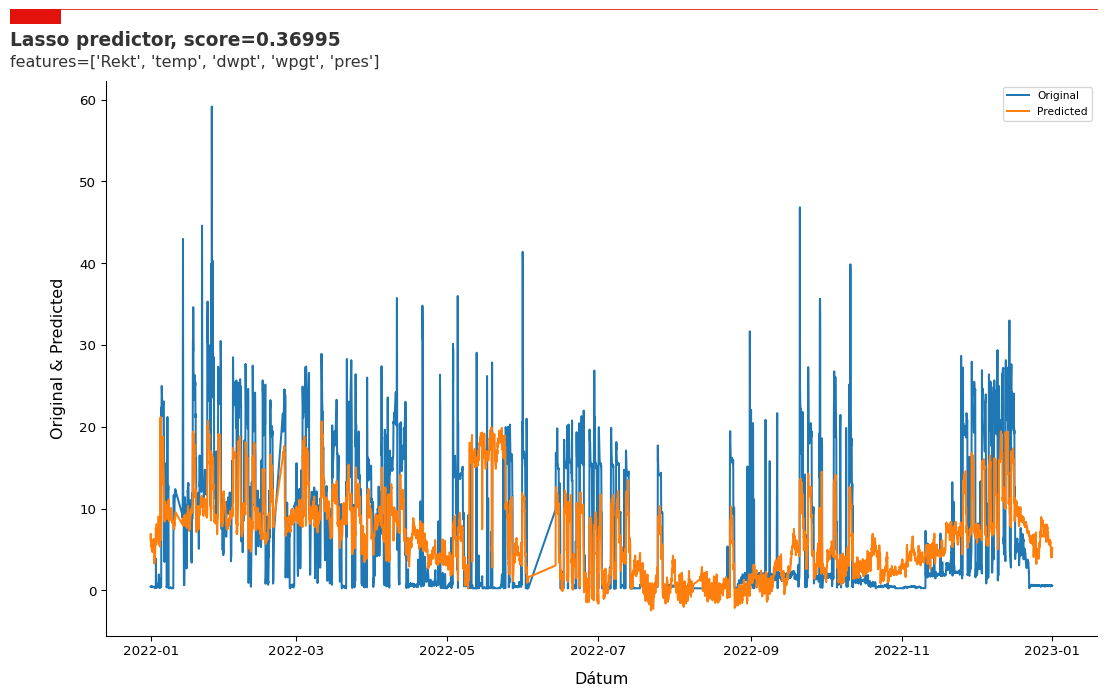

In [302]:
grafikon2(df_to_view,"Steam","Original","Steam_predicted","Predicted", title=f"Lasso predictor, score={lasso_score:0.5}",title2=f"features={predictors}", ngraf=2, xlabel="Dátum")

In [295]:
from sklearn.linear_model import LinearRegression

predictors=["Rekt","temp","dwpt","wpgt","pres"]


alpha=0.001
linreg = LinearRegression()
linreg.fit(all_data[predictors],all_data[["Steam"]])
y_pred = linreg.predict(all_data[predictors])


In [296]:
f_to_view=pd.DataFrame()
df_to_view=all_data[predictors]
df_to_view["Steam"]=all_data["Steam"]
df_to_view["Steam_predicted"]=y_pred




In [297]:
lin_score=score=linreg.score(all_data[predictors],all_data[["Steam"]])

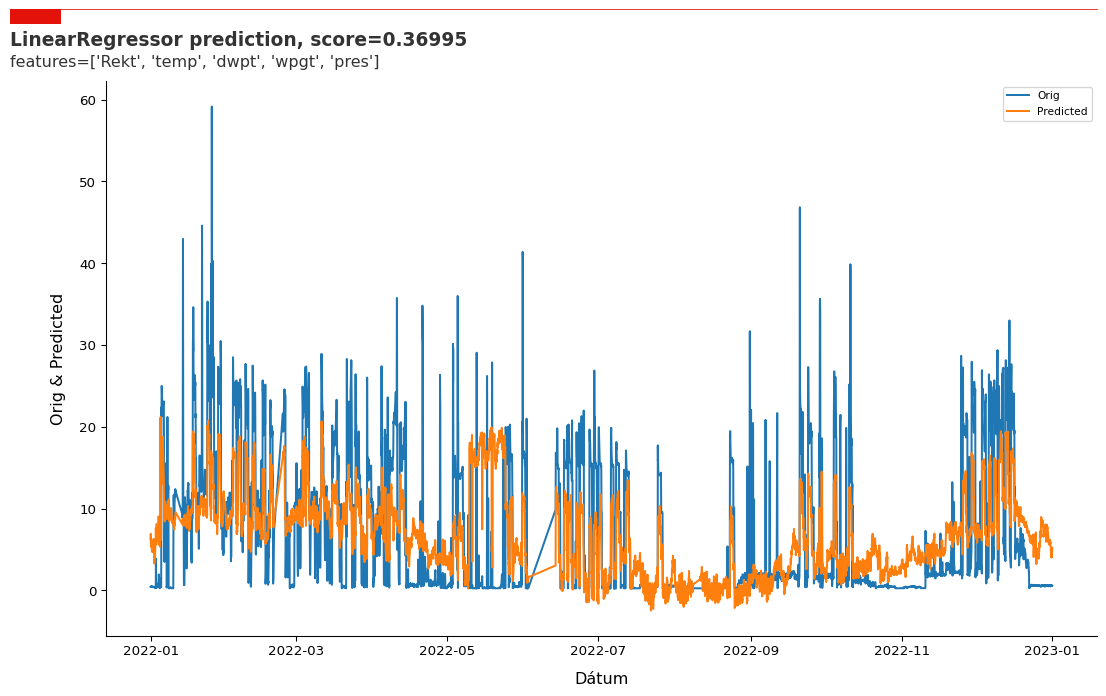

In [298]:
grafikon2(df_to_view,"Steam","Orig","Steam_predicted","Predicted", title=f"LinearRegressor prediction, score={lin_score:0.5}",title2=f"features={predictors}", ngraf=2, xlabel="Dátum")

**Vizsgáljuk meg, hogy melyik model alkalmas a feladatra!!**

In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

predictors=["Rekt","temp","dwpt","rhum","wdir","wspd","pres"]

X, y = shuffle(all_data[predictors], all_data["Steam"], random_state=13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 74%|███████▍  | 31/42 [01:22<00:13,  1.19s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [01:34<00:00,  2.25s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1406
[LightGBM] [Info] Number of data points in the train set: 7434, number of used features: 7
[LightGBM] [Info] Start training from score 6.591895
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.91       0.92   2.45   
RandomForestRegressor                        0.90       0.90   2.65   
LGBMRegressor                                0.90       0.90   2.69   
HistGradientBoostingRegressor                0.90       0.90   2.72   
BaggingRegressor                             0.89       0.89   2.77   
XGBRegressor                                 0.88       0.88   2.87   
GradientBoostingRegressor                    0.86       0.86   3.12   
MLPRegressor         

In [ ]:
# Best solution is the RandomForest!!

In [280]:
from sklearn.ensemble import RandomForestRegressor

predictors=["Rekt","temp","wspd","dwpt"] # "dwpt","rhum","wdir","wspd","pres"

alpha=0.001
rf_reg = RandomForestRegressor()
rf_reg.fit(all_data[predictors],all_data[["Steam"]])
y_pred = rf_reg.predict(all_data[predictors])


In [282]:
f4_score=score=rf_reg.score(all_data[predictors],all_data[["Steam"]])

In [ ]:
f_to_view=pd.DataFrame()
df_to_view=all_data[predictors]
df_to_view["Steam"]=all_data["Steam"]
df_to_view["Steam_predicted"]=y_pred



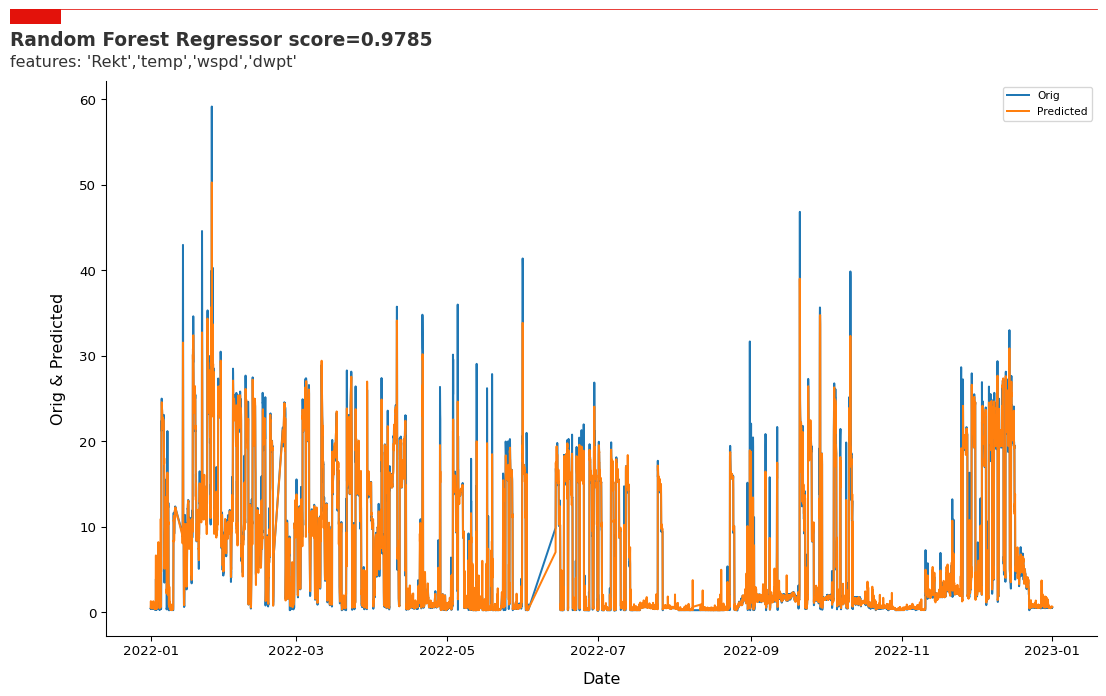

In [283]:
grafikon2(df_to_view,"Steam","Orig","Steam_predicted","Predicted", title=f"Random Forest Regressor, score={f4_score:0.5}",title2="features: 'Rekt','temp','wspd','dwpt' ", ngraf=2,xlabel="Date")

In [ ]:
all_data.corr()

Rekt  Steam  temp  dwpt  rhum  prcp  wdir  wspd  wpgt  pres  tsun  coco
Rekt   1.00   0.46  0.12  0.06 -0.11 -0.01  0.01 -0.02  0.04 -0.01   NaN -0.03
Steam  0.46   1.00 -0.31 -0.35 -0.01 -0.02  0.05  0.08  0.12  0.11   NaN  0.02
temp   0.12  -0.31  1.00  0.79 -0.49  0.01  0.10 -0.01  0.07 -0.31   NaN -0.08
dwpt   0.06  -0.35  0.79  1.00  0.13  0.09 -0.01 -0.14 -0.08 -0.39   NaN  0.07
rhum  -0.11  -0.01 -0.49  0.13  1.00  0.14 -0.21 -0.19 -0.26 -0.06   NaN  0.24
prcp  -0.01  -0.02  0.01  0.09  0.14  1.00  0.03  0.04  0.03 -0.17   NaN  0.45
wdir   0.01   0.05  0.10 -0.01 -0.21  0.03  1.00  0.38  0.47 -0.11   NaN  0.09
wspd  -0.02   0.08 -0.01 -0.14 -0.19  0.04  0.38  1.00  0.58 -0.17   NaN  0.14
wpgt   0.04   0.12  0.07 -0.08 -0.26  0.03  0.47  0.58  1.00 -0.18   NaN  0.13
pres  -0.01   0.11 -0.31 -0.39 -0.06 -0.17 -0.11 -0.17 -0.18  1.00   NaN -0.30
tsun    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
coco  -0.03   0.02 -0.08  0.07  0.24  0.45  0.09  0.14  0.13 -0.30   NaN  1.00

Adatok

|Rekt|Steam|temp|dwpt|rhum|prcp|wdir|wspd|wpgt|pres|tsun|coco
|----|----|----|----|----|----|----|----|----|----|----|----
|***0.46***|1.00|***-0.31***|***-0.35***|-0.01|-0.02|0.05|0.08|***0.12***|***0.11***|NaN|0.02


temp	The air temperature in °C	Float

dwpt	The dew point in °C	Float

rhum	The relative humidity in percent (%)	Integer

prcp	The one hour precipitation total in mm	Float

snow	The snow depth in mm	Integer

wdir	The wind direction in degrees (°)	Integer

wspd	The average wind speed in km/h	Float

wpgt	The peak wind gust in km/h	Float

pres	The sea-level air pressure in hPa	Float

tsun	The one hour sunshine total in minutes (m)	Integer


In [270]:
from sklearn.ensemble import RandomForestRegressor

predictors=["Rekt","temp","dwpt","wpgt","pres"] # min 0.1

alpha=0.00001
rf_reg = RandomForestRegressor()
rf_reg.fit(all_data[predictors],all_data[["Steam"]])
y_pred = rf_reg.predict(all_data[predictors])

In [277]:
f5_score=score=rf_reg.score(all_data[predictors],all_data[["Steam"]])

In [271]:
f_to_view=pd.DataFrame()
df_to_view=all_data[predictors]
df_to_view["Steam"]=all_data["Steam"]
df_to_view["Steam_predicted"]=y_pred



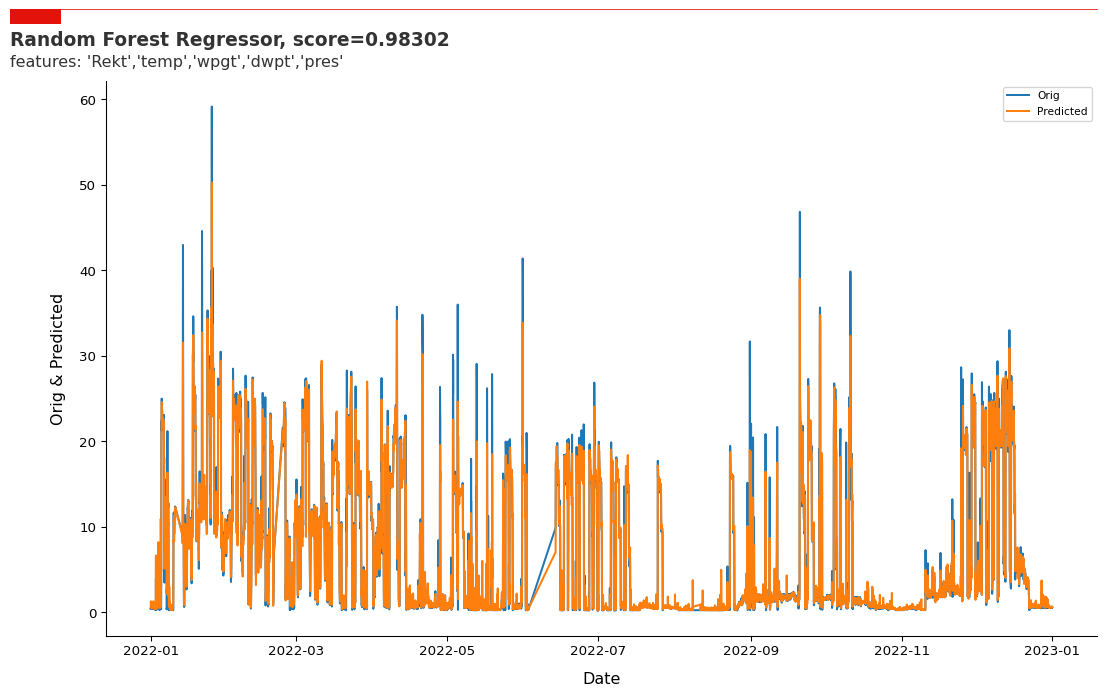

In [284]:
grafikon2(df_to_view,"Steam","Orig","Steam_predicted","Predicted",ngraf=2,xlabel="Date",title=f"Random Forest Regressor, score={f5_score:0.5}",title2="features: 'Rekt','temp','wpgt','dwpt','pres' " )

In [ ]:
all_data.head()

Rekt  Steam  temp  dwpt  rhum  prcp   wdir  wspd  wpgt  \
2022-01-01 00:00:00  2.91   0.44  3.70  3.10 96.00  0.00 300.00  7.20 16.70   
2022-01-01 01:00:00  2.90   0.45  2.50  1.80 95.00  0.00 287.00  4.00 18.50   
2022-01-01 02:00:00  2.93   0.40  7.20  6.80 97.00  0.00 295.00 10.80 25.90   
2022-01-01 03:00:00  2.92   0.48  9.50  6.40 81.00  0.00 290.00 10.80 27.80   
2022-01-01 04:00:00  2.93   0.45  8.60  5.20 79.00  0.00 300.00 10.80 33.30   

                       pres  tsun  coco  
2022-01-01 00:00:00 1020.20  0.00  3.00  
2022-01-01 01:00:00 1019.90  0.00  3.00  
2022-01-01 02:00:00 1019.80  0.00  3.00  
2022-01-01 03:00:00 1020.10  0.00  3.00  
2022-01-01 04:00:00 1020.70  0.00  3.00

In [ ]:
df_m=all_data[all_data.index.month==4]

In [ ]:
df_m.corr()["Steam"]["temp"]

-0.3169313789576306

In [ ]:
def corr_monthly(df,tag1,tag2):
    o=[]
    h=[]
    for m in range(1,13):
        df_m=all_data[all_data.index.month==m]
        correlation=df_m.corr()[tag1][tag2]
        o.append(correlation)
        h.append(m)
    print(h)
    df_out=pd.DataFrame()
    df_out["month"]=h
    df_out["corr"]=o

    return(df_out)

In [ ]:
df_steam_temp=corr_monthly(all_data,"Steam","temp")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [ ]:
df_steam_temp.head()

month  corr
0      1 -0.40
1      2  0.01
2      3 -0.29
3      4 -0.32
4      5  0.07

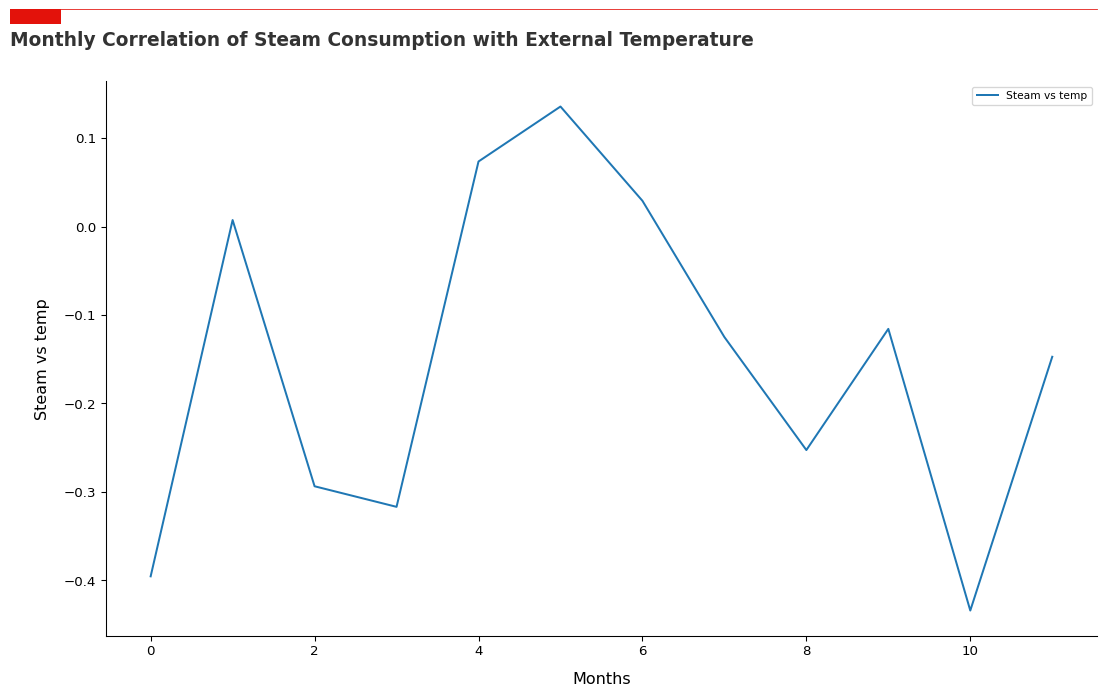

In [259]:
grafikon2(df_steam_temp,"corr","Steam vs temp",title="Monthly Correlation of Steam Consumption with External Temperature", x="month",ngraf=1,xlabel="Months")

In [ ]:
df_steam_rekt=corr_monthly(all_data,"Steam","Rekt")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


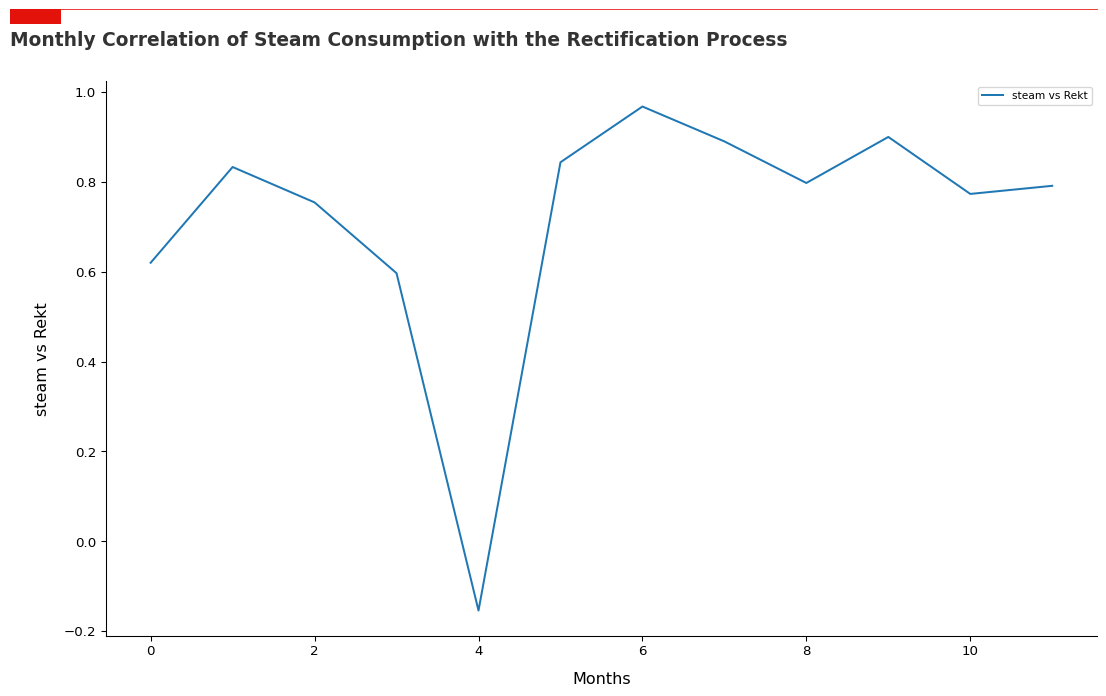

In [257]:
grafikon2(df_steam_rekt,"corr","Steam vs Rekt",title="Monthly Correlation of Steam Consumption with the Rectification Process", x="month",ngraf=1, xlabel="Months")

In [ ]:
rf_reg.score(all_data[predictors],all_data[["Steam"]])

0.9828940515217675

# **Összefoglalás:**

- A rektifikálás erőteljes hatással bír a gőzfogyasztásra
- A környezeti paraméterek szintén hatással vannak a gőzfogyasztásra
- "Rekt","temp","dwpt","wpgt","pres"]paraméterek segítségével olyan modell alkotható, ami a 98%-osan reprodukálni tudja a gőzfogyasztási adatokat
# **Fejlesztési lehetőségek**
- hibaállapot előrejelzése,
- hibadetektálás
- virtuális mérőkör, smartsenzor fejlesztés
- predikció, rendszer állapotainak előrejelzése


# **Summary:**
- Rectification has a significant impact on steam consumption.
- Environmental parameters also affect steam consumption.
- By using the parameters "Rect," "Temp," "Dwpt," "Wpgt," and "Pres," a model can be created that can reproduce steam consumption data with 98% accuracy.
# **Development opportunities:**
- Fault prediction,
- Error detection,
- Development of a virtual measuring circuit and smart sensor,
- Prediction of system states.



File ‘colab_pdf.py’ already there; not retrieving.





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y

'File Download Unsuccessful. Saved in Google Drive'